In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10),
    Softmax()
])

In [4]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [7]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=[acc, mae])

In [9]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)

sparse_categorical_crossentropy
[]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [11]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [12]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [13]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [14]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.0
test_images = test_images / 255.0

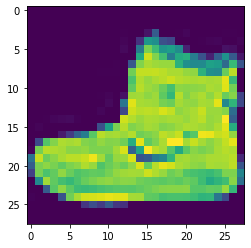

label: Ankle boot


In [15]:
# Display one of the images

i = 0
img = train_images[i, :, :]
plt.imshow(img)
plt.show()
print("label:", labels[train_labels[i]])

#### Fit the model

In [16]:
# Fit the model

history = model.fit(train_images[..., np.newaxis], train_labels, epochs=8, batch_size=256, verbose=2)

Epoch 1/8
235/235 - 5s - loss: 0.5668 - sparse_categorical_accuracy: 0.8019 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 - 1s - loss: 0.3702 - sparse_categorical_accuracy: 0.8698 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 - 1s - loss: 0.3341 - sparse_categorical_accuracy: 0.8814 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 - 1s - loss: 0.3124 - sparse_categorical_accuracy: 0.8882 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 - 1s - loss: 0.2989 - sparse_categorical_accuracy: 0.8939 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 - 1s - loss: 0.2875 - sparse_categorical_accuracy: 0.8971 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 - 1s - loss: 0.2785 - sparse_categorical_accuracy: 0.9011 - mean_absolute_error: 4.4200
Epoch 8/8
235/235 - 1s - loss: 0.2734 - sparse_categorical_accuracy: 0.9025 - mean_absolute_error: 4.4200


#### Plot training history

In [17]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.566809,0.801933,4.420002
1,0.370218,0.869850,4.420001
2,0.334092,0.881433,4.419999
3,0.312365,0.888233,4.419999
4,0.298903,0.893933,4.420000
5,0.287508,0.897150,4.420002
6,0.278478,0.901067,4.420000
7,0.273370,0.902500,4.420000


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

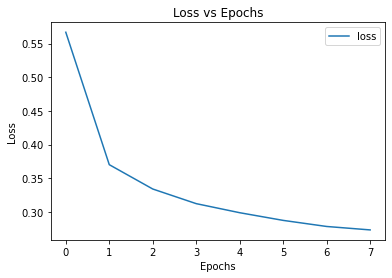

In [18]:
# Make a plot for the loss

loss_plot = df.plot(y="loss", title = "Loss vs Epochs", legend=True)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

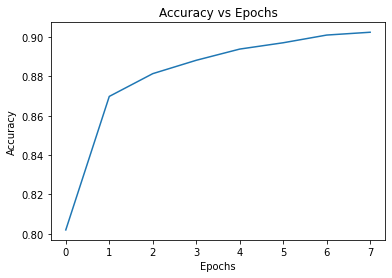

In [19]:
# Make a plot for the accuracy

acc_plot = df.plot(y="sparse_categorical_accuracy", title = "Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Mean Absolute Error')]

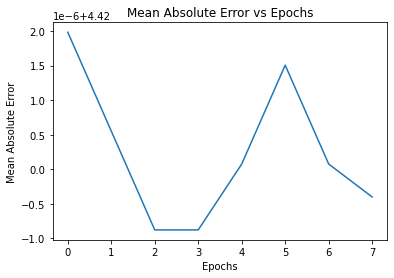

In [20]:
# Make a plot for the additional metric

mae_plot = df.plot(y="mean_absolute_error", title = "Mean Absolute Error vs Epochs", legend=False)
mae_plot.set(xlabel="Epochs", ylabel="Mean Absolute Error")

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [21]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [22]:
# Evaluate the model

test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)

313/313 - 1s - loss: 0.3046 - sparse_categorical_accuracy: 0.8908 - mean_absolute_error: 4.4200


#### Make predictions from the model

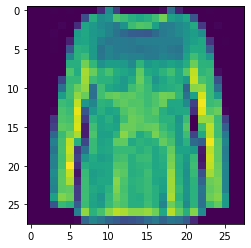

Label: Pullover


In [23]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [24]:
# Get the model predictions

predictions = model.predict(test_image[np.newaxis, ..., np.newaxis])
print("Model prediction:", labels[np.argmax(predictions)])

Model prediction: Pullover
